In [1]:
import os
trainDir = '/home/prantika/Desktop/covid19_LUNGS/xray_dataset_covid19/train'
validDir ='/home/prantika/Desktop/covid19_LUNGS/xray_dataset_covid19/test'
trainNormDir = os.path.join(trainDir, 'NORMAL')
trainPneumDir = os.path.join(trainDir, 'PNEUMONIA')
validNormDir = os.path.join(validDir, 'NORMAL')
validaPneumDir = os.path.join(validDir, 'PNEMONIA')

In [2]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.optimizers import RMSprop, Adam

import matplotlib.pyplot as plt

In [3]:
import logging
logging.getLogger('tensorflow').disabled = True

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
trDataGen = ImageDataGenerator(rescale=1./255)
valDataGen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
trainGen = trDataGen.flow_from_directory(
        trainDir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
valGen = valDataGen.flow_from_directory(
        validDir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 148 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [5]:
# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
inputImage= layers.Input(shape=(150, 150, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', padding = 'same')(inputImage)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(filters = 32, kernel_size = (3, 3), activation='relu', padding = 'same')(x)
x = layers.MaxPooling2D(pool_size = (2, 2))(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(filters = 64, kernel_size = (3, 3), activation='relu', padding = 'same')(x)
x = layers.MaxPooling2D(pool_size = (2, 2))(x)

# Fourth convolution extracts 128 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(filters = 128, kernel_size = (3, 3), activation='relu', padding = 'same')(x)
x = layers.MaxPooling2D(pool_size = (2, 2))(x)

# Fifth convolution extracts 256 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(filters = 256, kernel_size = (3, 3), activation='relu', padding = 'same')(x)
x = layers.MaxPooling2D(pool_size = (2, 2))(x)

In [6]:
# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully 
# connected layer + sigmoid output layer
model = models.Model(inputImage, output)

In [7]:
model.compile(loss = 'binary_crossentropy', optimizer = Adam(lr= 0.001), metrics = ['acc'])

In [8]:
history = model.fit(trainGen, epochs = 10, validation_data = valGen)

Epoch 1/10
8/8 [==============================] - 6s 757ms/step - loss: 0.7156 - acc: 0.5203 - val_loss: 0.6833 - val_acc: 0.8750
Epoch 2/10
8/8 [==============================] - 5s 634ms/step - loss: 0.6827 - acc: 0.5608 - val_loss: 0.6400 - val_acc: 0.6750
Epoch 3/10
8/8 [==============================] - 5s 602ms/step - loss: 0.5871 - acc: 0.6892 - val_loss: 0.3332 - val_acc: 0.8250
Epoch 4/10
8/8 [==============================] - 5s 650ms/step - loss: 0.3768 - acc: 0.8311 - val_loss: 0.0623 - val_acc: 0.9750
Epoch 5/10
8/8 [==============================] - 5s 611ms/step - loss: 0.2827 - acc: 0.8919 - val_loss: 0.0840 - val_acc: 0.9750
Epoch 6/10
8/8 [==============================] - 5s 623ms/step - loss: 0.1647 - acc: 0.9459 - val_loss: 0.0712 - val_acc: 0.9750
Epoch 7/10
8/8 [==============================] - 5s 611ms/step - loss: 0.1454 - acc: 0.9459 - val_loss: 0.0029 - val_acc: 1.0000
Epoch 8/10
8/8 [==============================] - 5s 596ms/step - loss: 0.0916 - acc: 0.96

In [10]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(150,150))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1,150,150, 3)
	# center pixel data
	img = img.astype('float32')
	img = img - [123.68, 116.779, 103.939]
	return img

# load an image and predict the class
	# load the image
img = load_image('/home/prantika/Desktop/covid19_LUNGS/xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0092-0001.jpeg')
# predict the class
result = model.predict(img)
print(result)
if(result[0]>0.5):
  print("PNEUMONIA")
else:
  print("NORMAL")

[[0.]]
NORMAL


In [11]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


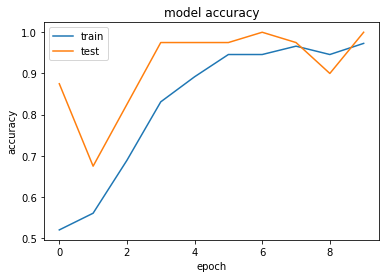

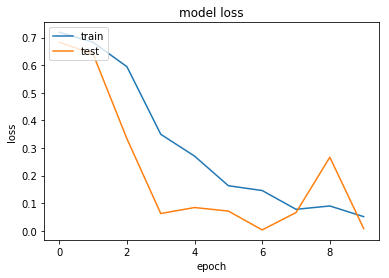

In [9]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()